In [1]:
import numpy as np
from numpy import random
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [2]:
import pickle
########### LOAD DATA
# The data consists of 16*10000 samples taken in T=np.arange(0.25,4.0001,0.25):
data_file_name = "../lab5/risorse/Ising2DFM_reSample_L40_T=All.pkl"
# The labels are obtained from the following file:
label_file_name = "../lab5/risorse/Ising2DFM_reSample_L40_T=All_labels.pkl"
#DATA
with open(data_file_name, 'rb') as f:
    print(f)
    X = pickle.load(f)
X = np.unpackbits(X).reshape(-1, 1600) # Decompress array and reshape for convenience
X=X.astype('int')
X[np.where(X==0)]=-1 # map 0 state to -1 (Ising variable can take values +/-1)
#LABELS (convention is 1 for ordered states and 0 for disordered states)
with open(label_file_name, 'rb') as f:
    labels = pickle.load(f)

<_io.BufferedReader name='../lab5/risorse/Ising2DFM_reSample_L40_T=All.pkl'>


In [3]:
#reshaping by temperature
X = np.reshape(X, (16, 10000, 1600))

In [4]:
#chooseing randomly data from each batch
index_chosen = []
X_chosen = []
sample_number = 100

for i in range(16):
    index_chosen.extend(random.choice(1600, sample_number).tolist())
    for j in index_chosen:
        X_chosen.append(X[i][j])
    index_chosen = []

In [5]:
#renaming X_chosen to X
X = np.array(X_chosen)
X

array([[-1, -1, -1, ..., -1, -1, -1],
       [-1, -1, -1, ..., -1, -1, -1],
       [ 1,  1,  1, ...,  1,  1,  1],
       ...,
       [ 1, -1, -1, ..., -1,  1, -1],
       [-1, -1, -1, ...,  1, -1,  1],
       [-1,  1,  1, ...,  1,  1,  1]])

In [6]:
pca = PCA(n_components=2)
pca.fit(X)
X_reduced = X@pca.components_.T

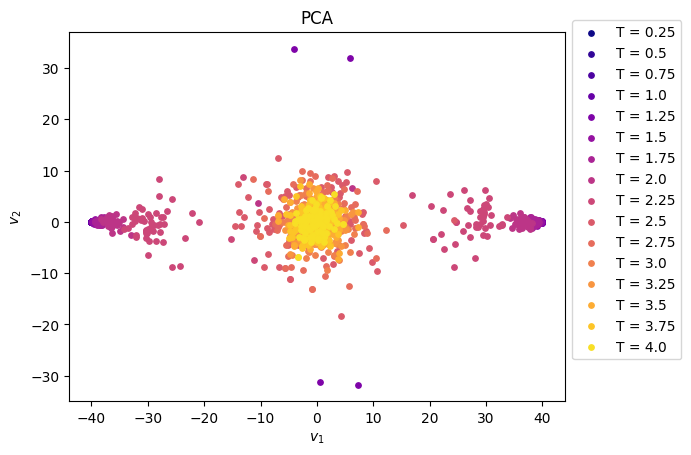

In [7]:
fig, ax = plt.subplots()

cm = plt.get_cmap('plasma')
ax.set_prop_cycle('color', [cm(1.*i/16) for i in range(16)])

for i in range(16):
    ax.scatter(X_reduced[sample_number*i:sample_number*(i+1), 0], X_reduced[sample_number*i:sample_number*(i+1), 1], label = f"T = {(i+1)*0.25}", s = 15)

ax.legend(bbox_to_anchor=(1, 1.05))
plt.xlabel(r'$v_1$')
plt.ylabel(r'$v_2$')
plt.title('PCA')
plt.savefig('relazione/immagini/ising_scatter.png', bbox_inches='tight', dpi = 1000)

In [16]:
tsne = TSNE(n_components=2,perplexity=50.0)
X_reduced = tsne.fit_transform(X)

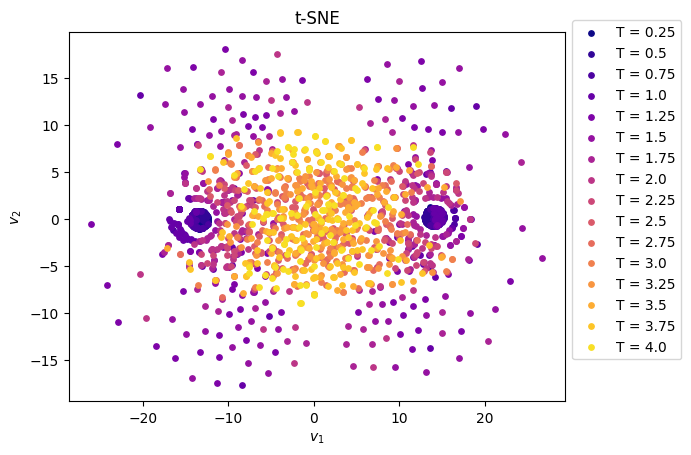

In [17]:
fig, ax = plt.subplots()

cm = plt.get_cmap('plasma')
ax.set_prop_cycle('color', [cm(1.*i/16) for i in range(16)])

for i in range(16):
    ax.scatter(X_reduced[sample_number*i:sample_number*(i+1), 0], X_reduced[sample_number*i:sample_number*(i+1), 1], label = f"T = {(i+1)*0.25}", s = 15)

ax.legend(bbox_to_anchor=(1, 1.05))
plt.xlabel(r'$v_1$')
plt.ylabel(r'$v_2$')
plt.title('t-SNE')
plt.savefig('relazione/immagini/ising_tSNE.png', bbox_inches='tight', dpi = 1000)